## Script to verify the simulation against anisotropy theory

In [1]:
import numpy as np
import opmsim as opm
from opmsim.rays import PolarRays
from opmsim.dipole_source import DipoleSource
from opmsim.optical_system import OpticalSystem
from opmsim.optical_elements import SineLens, LinearPolariser, FlatMirror
import opmsim.anisotropy as anisotropy
import matplotlib.pyplot as plt

c:\users\leo\python\opmsim\opmsim\rays.py:74: RuntimeWarning: invalid value encountered in scalar divide
  self.ray_density = self.n / np.sum(area_elements)  # so values dont change with ray number


In [2]:
# List of NAs to check
NA_list = np.linspace(0.01, 0.99, 5, endpoint=True)

[0.9999999996871947, 0.9998611243314025, 0.9976048636419217, 0.9838251788249036, 0.8726646902362338]


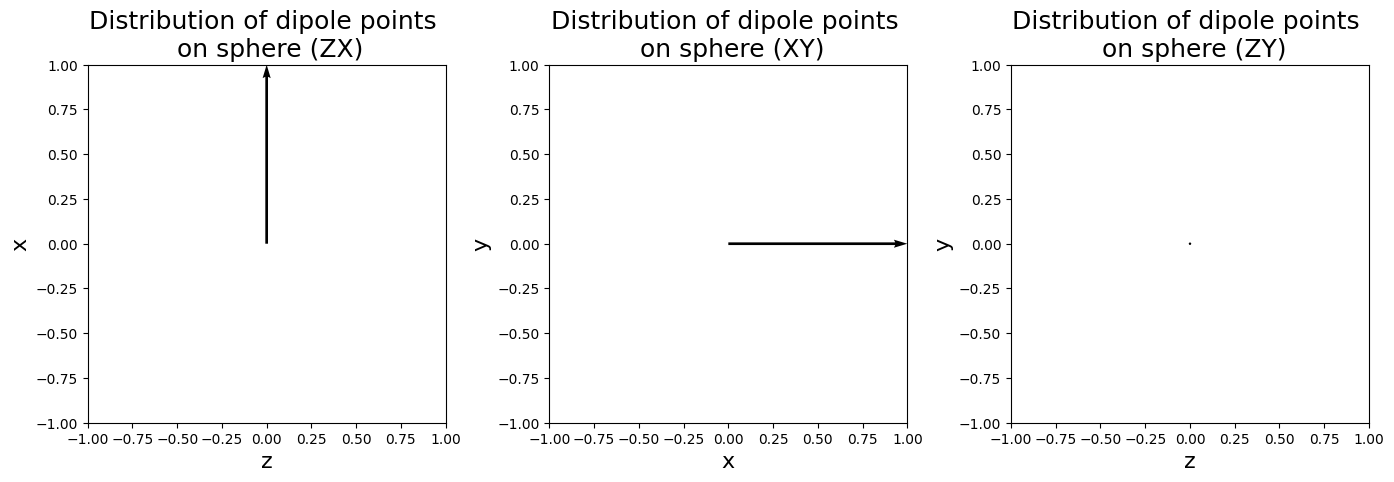

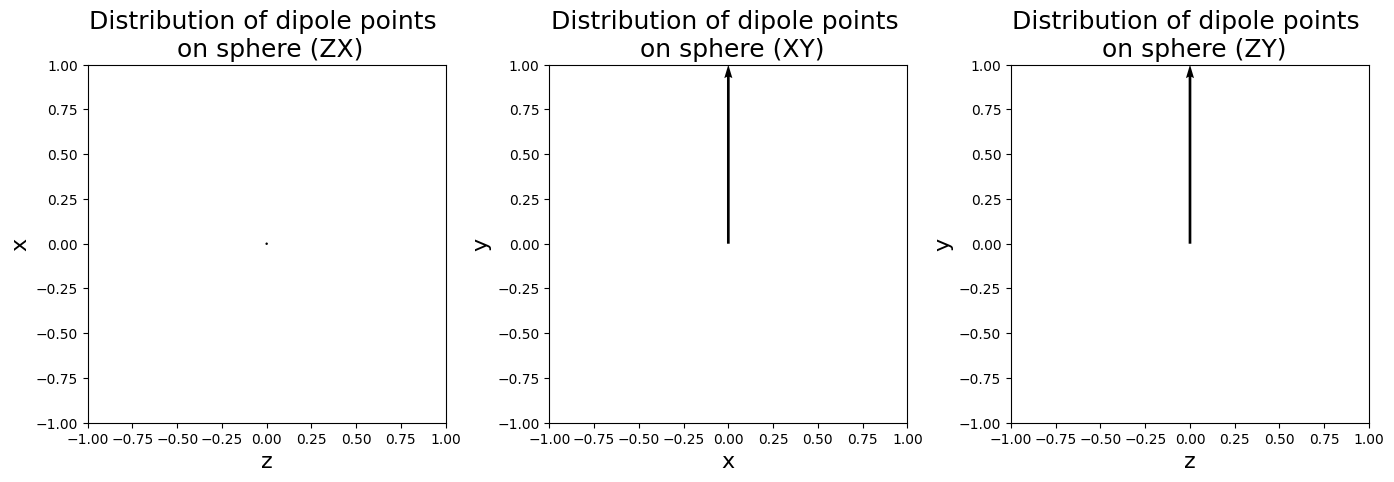

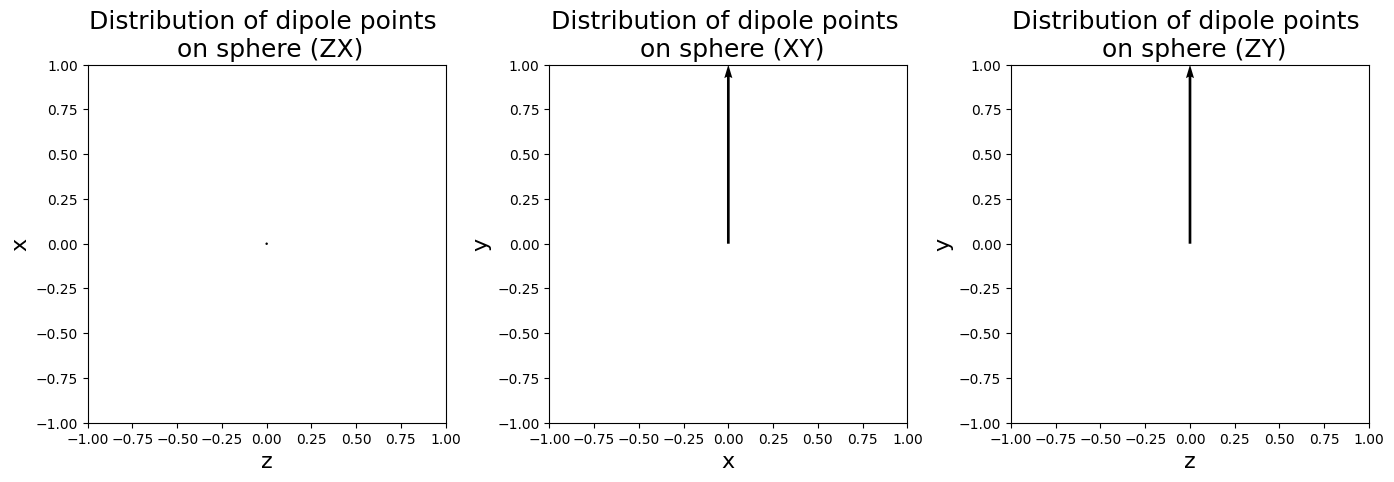

In [3]:
# Generate optical systems
# Optical system is a simple one lens system
element_lists = [[SineLens(NA=NA_list[i], focal_length=1)] for i in range(len(NA_list))]
element_lists_m = [[SineLens(NA=NA_list[i], focal_length=1), FlatMirror()] for i in range(len(NA_list))]

anisotropy_theory = [anisotropy.theoretical_anisotropy(NA, (np.pi/2, 0)) for NA in NA_list]
print(anisotropy_theory)

# Create dipole sources
source_x = DipoleSource((0,0))  # single x-dipole
source_x.plot_distribution()
source_y = DipoleSource((np.pi/2,0))  # single y-dipole
source_y.plot_distribution()


In [ ]:
anisotropy_theory_x = []
anisotropy_sim_x = []

anisotropy_theory_y = []
anisotropy_sim_y = []

for elements in element_lists:
    os = OpticalSystem(elements=elements, source=source_x)
    os.trace_system()
    print(np.mean(os.get_detector().Ix_integral), np.mean(os.get_detector().Iy_integral))
    aniso_sim = anisotropy.calculate_anisotropy(os.detector, 0)
    aniso_theory = anisotropy.theoretical_anisotropy(NA=elements[0].NA, dipole_orientation=(0,0))
    anisotropy_sim_x.append(aniso_sim)
    anisotropy_theory_x.append(aniso_theory)

    os = OpticalSystem(elements=elements, source=source_y)
    os.trace_system()
    print(np.mean(os.get_detector().Ix_integral), np.mean(os.get_detector().Iy_integral))
    aniso_sim = anisotropy.calculate_anisotropy(os.detector, np.pi/2)
    aniso_theory = anisotropy.theoretical_anisotropy(NA=elements[0].NA, dipole_orientation=(0,0))
    anisotropy_sim_y.append(aniso_sim)
    anisotropy_theory_y.append(aniso_theory)


In [ ]:
print("x anisotropy:", anisotropy_sim_x)
# print(anisotropy_theory_x)
print("y anisotropy:", anisotropy_sim_y)
# print(anisotropy_theory_y)
print("anisotropy_theory", anisotropy_theory)


## Now check the photoselection anisotropy 

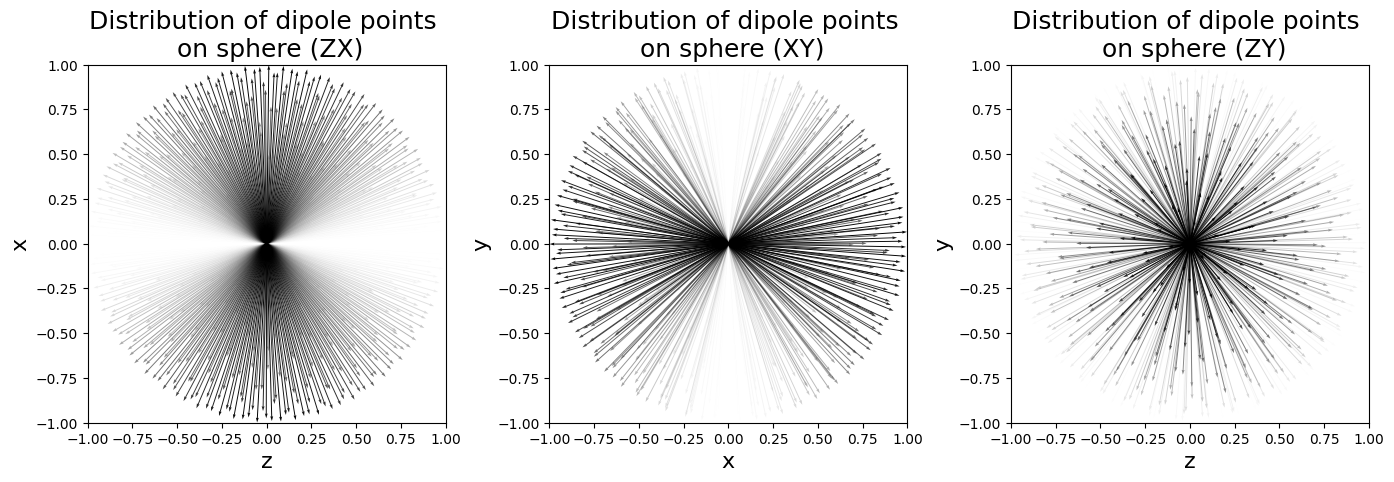

NAs [0.01  0.255 0.5   0.745 0.99 ]
[0.39999399979001876, 0.39600688841926246, 0.38350575810130116, 0.3576170779543806, 0.28414901413286714]


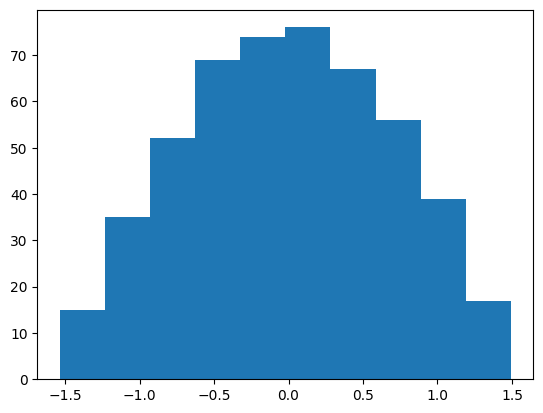

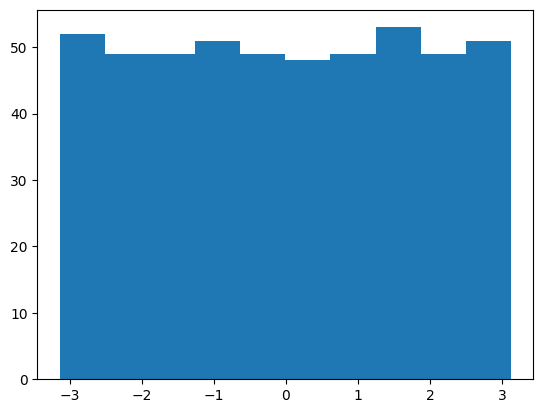

In [ ]:
# Create dipole sources
source_uniform = DipoleSource()
source_uniform.generate_dipole_ensemble(dipole_count=500)
source_uniform.classical_photoselection((0,0))  # x excitation

print("NAs", NA_list)

element_lists = [[SineLens(NA=NA_list[i], focal_length=1)] for i in range(len(NA_list))]

anisotropy_photoselection_sim = []
anisotropy_photoselection_theory = [anisotropy.theoretical_anisotropy_population(NA) for NA in NA_list]

print(anisotropy_photoselection_theory)


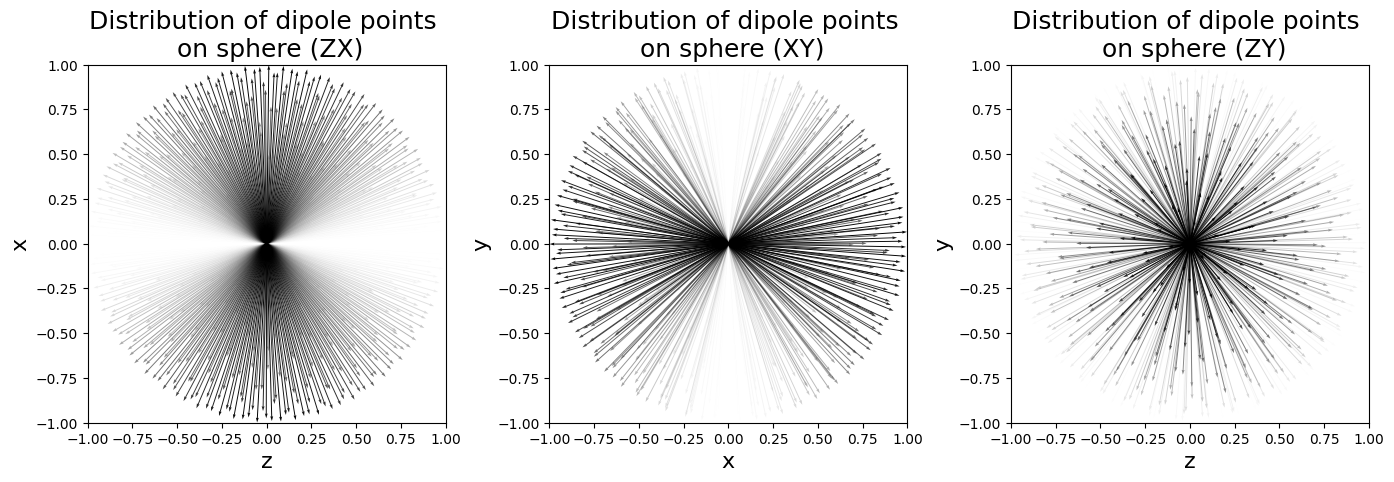

Lens 0: flipped=False


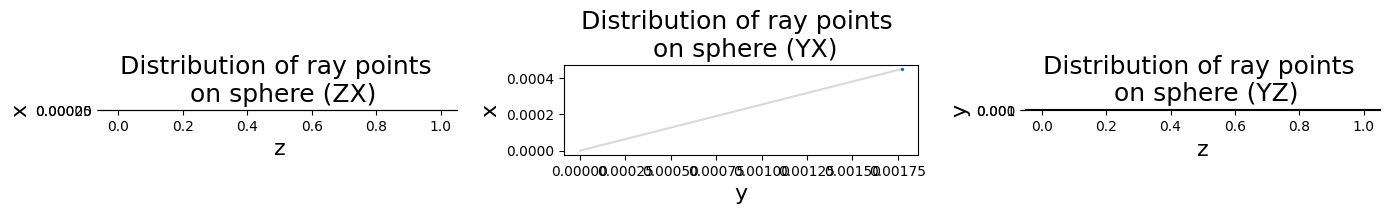

Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x000002724173DDF0>] (1 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x000002724173DDF0> (1/1) label: 
Final wavefront is flat!
0 rays escaped out of 1
Not enough points to plot pupil, skipping
0.20017044867042827 0.06671651367744093


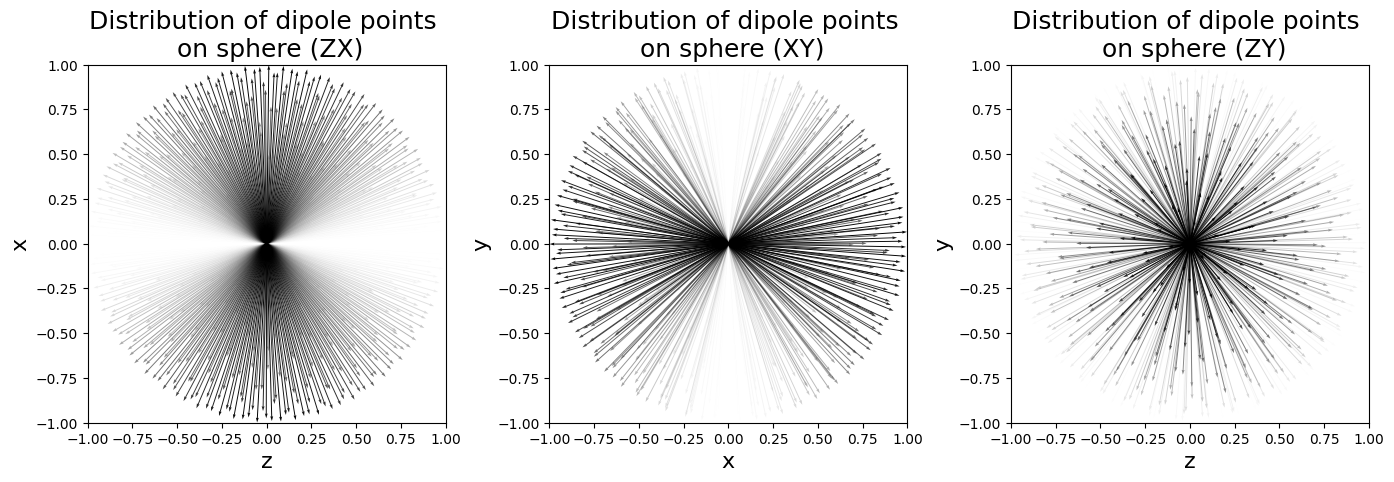

Lens 0: flipped=False


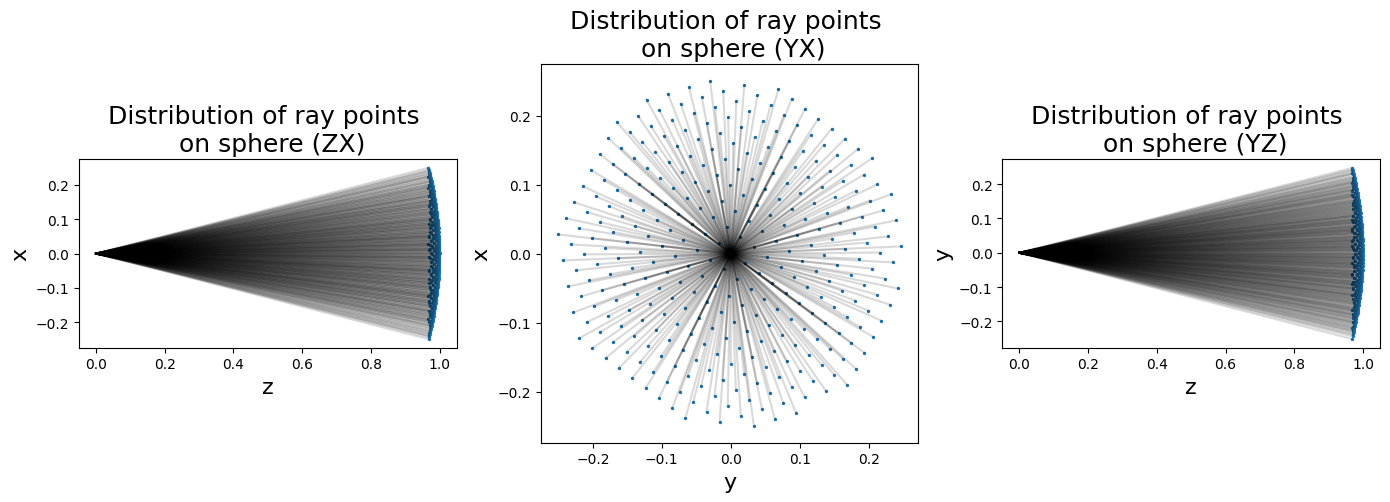

Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x00000272417B3920>] (1 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x00000272417B3920> (1/1) label: 
Final wavefront is flat!
0 rays escaped out of 326


c:\users\leo\python\opmsim\opmsim\visualization\pupil_plot.py:99: UserWarning: The following kwargs were not used by contour: 'title'
  pc1 = ax.tricontourf(x, y, data, title="", cmap=cmap, levels=levels,


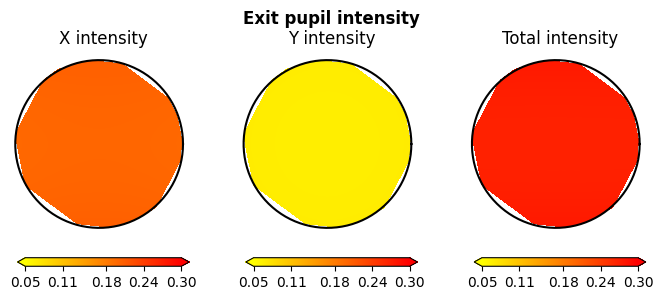

64.55759836290781 21.751520233485216


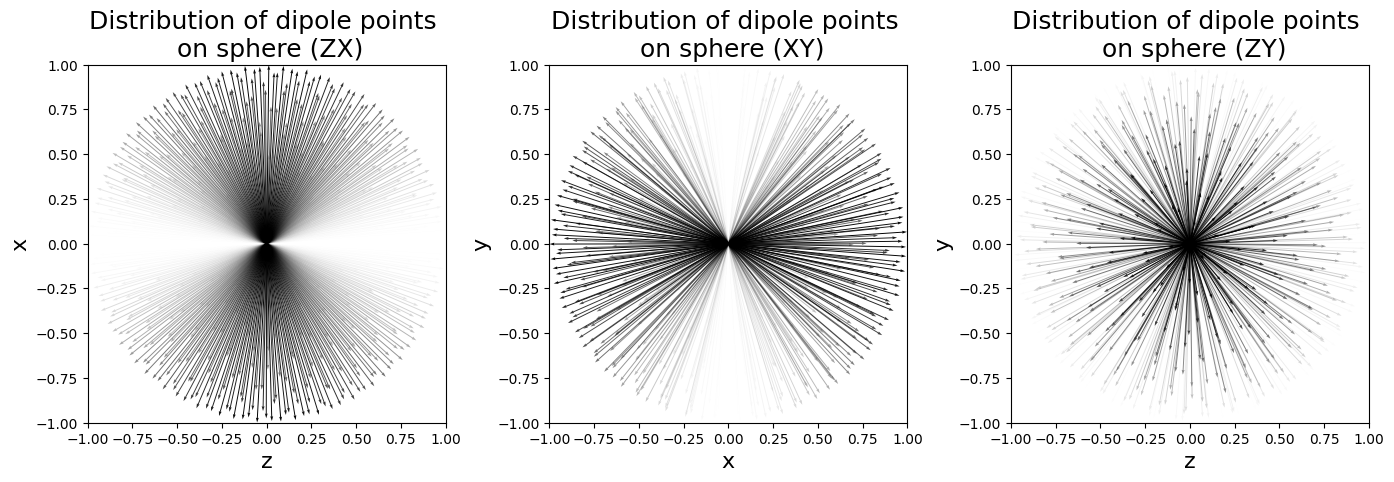

Lens 0: flipped=False


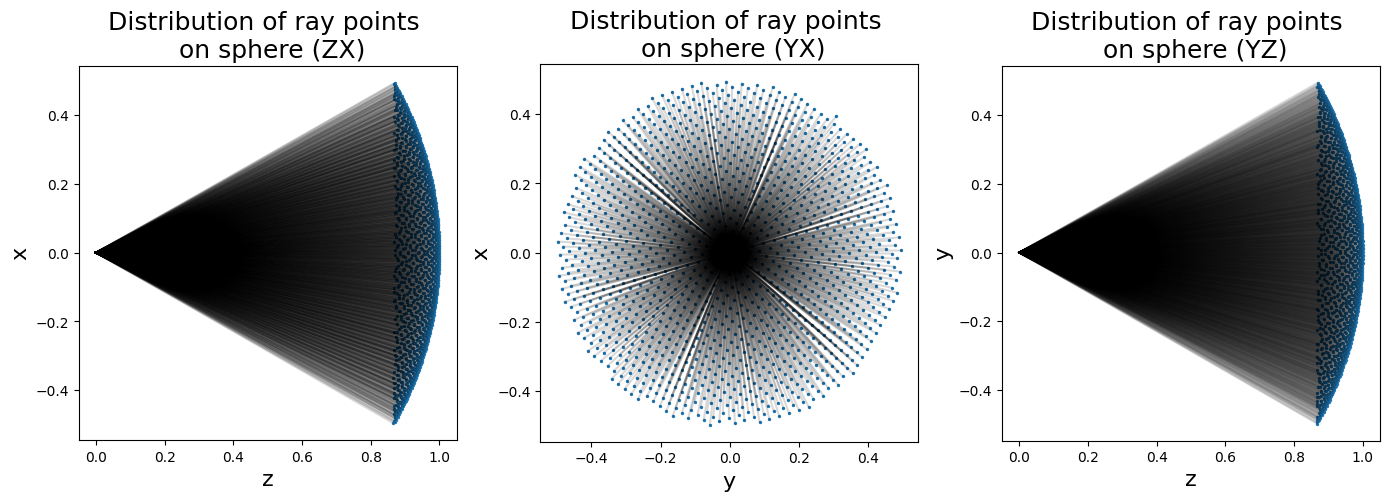

Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x000002724179A570>] (1 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x000002724179A570> (1/1) label: 
Final wavefront is flat!
0 rays escaped out of 1336


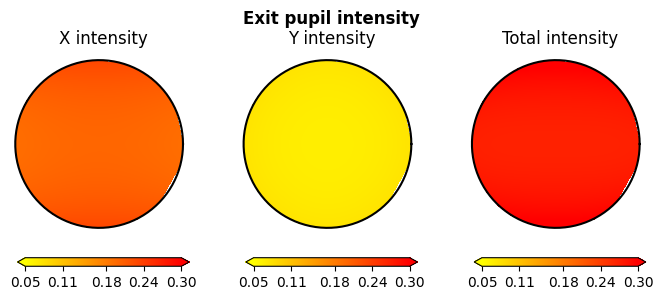

255.95370684204562 89.26649857962595


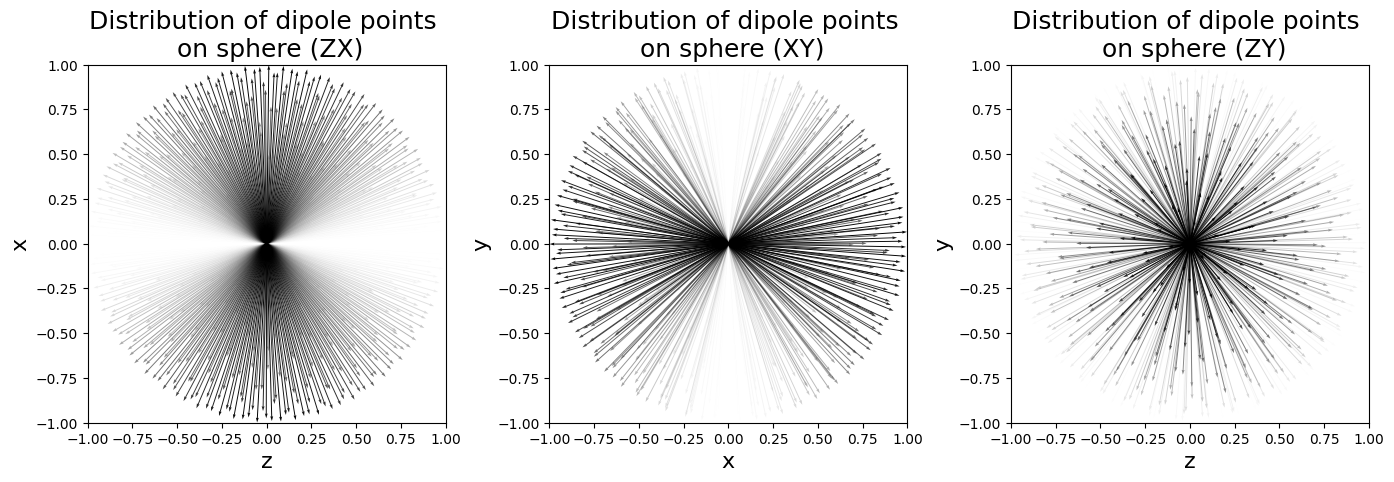

Lens 0: flipped=False


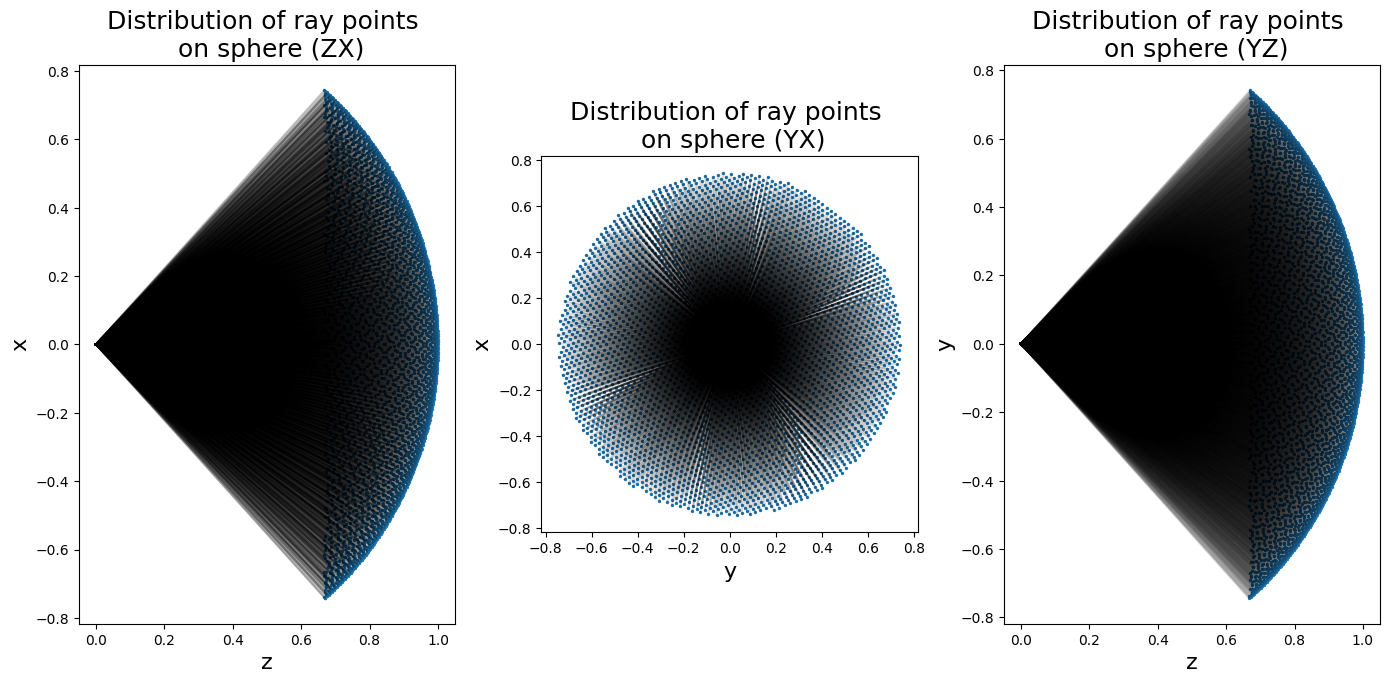

Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x0000027243F92480>] (1 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x0000027243F92480> (1/1) label: 
Final wavefront is flat!
0 rays escaped out of 3329


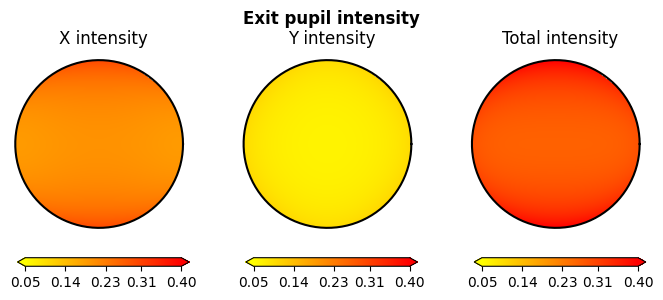

598.7122480450248 224.14611850278897


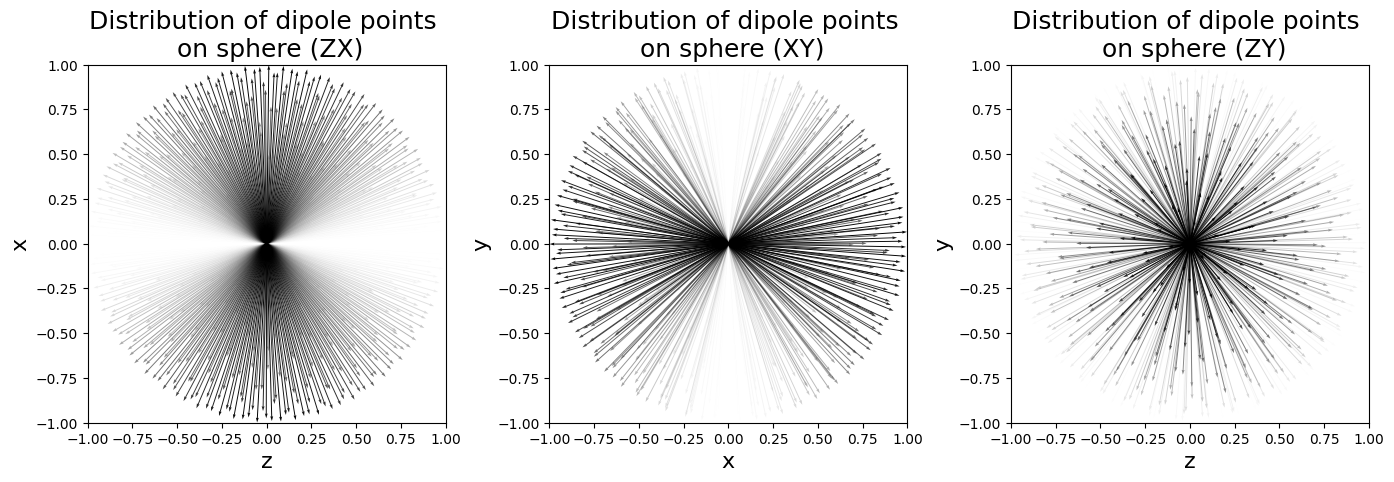

Lens 0: flipped=False


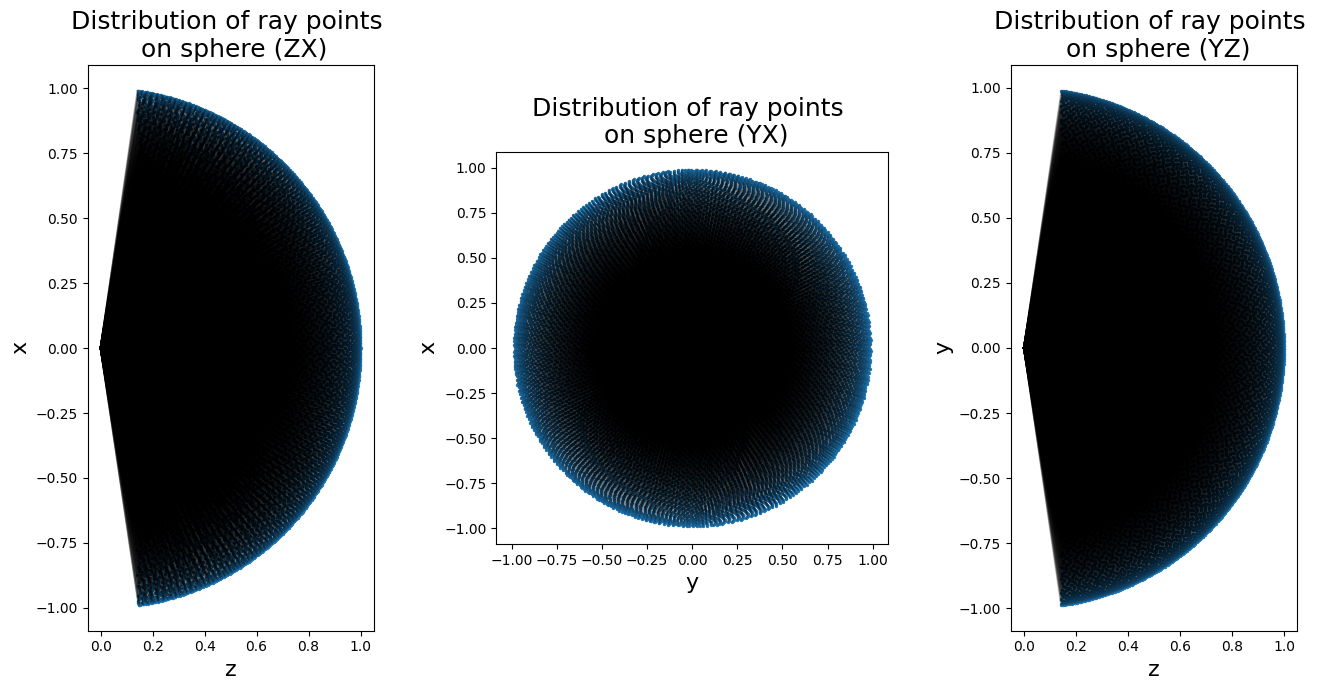

Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x0000027243F90650>] (1 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x0000027243F90650> (1/1) label: 
Final wavefront is flat!
0 rays escaped out of 8592


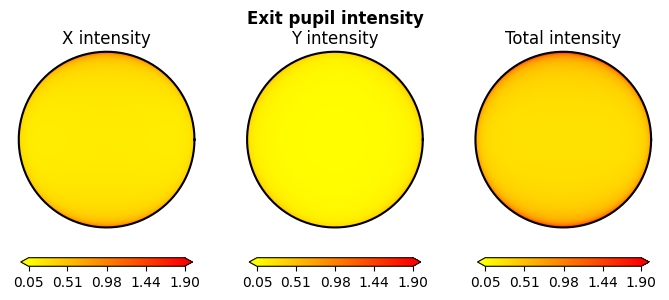

1333.1659745986035 608.5049764751908


In [5]:
for elements in element_lists:
    os = OpticalSystem(elements=elements, source=source_uniform)
    source_uniform.plot_distribution()
    os.default_ray_count = 10_000
    os.trace_system()
    print(os.get_detector().Ix_integral, os.get_detector().Iy_integral)
    anisotropy_photoselection_sim.append(
        anisotropy.calculate_anisotropy(os.get_detector(), 0))
    

In [6]:
print("anisotropy_photoselection_sim", anisotropy_photoselection_sim)
print("anisotropy_photoselection_theory", anisotropy_photoselection_theory) 

anisotropy_photoselection_sim [0.400037603273841, 0.3961301598152955, 0.38364167816265765, 0.3577502626687723, 0.2841611789583066]
anisotropy_photoselection_theory [0.39999399979001876, 0.39600688841926246, 0.38350575810130116, 0.3576170779543806, 0.28414901413286714]


## Now test all angles of single dipoles

In [4]:
phi_d_angles = np.linspace(0, 2 * np.pi, 10)  # dipole azimuth
alpha_d_angles = np.linspace(0, np.pi/2, 5)  # dipole polar
aniso_grid = np.zeros((len(NA_list), len(phi_d_angles), len(alpha_d_angles)))
aniso_grid_theory = np.zeros((len(NA_list), len(phi_d_angles), len(alpha_d_angles)))
# source_uniform = DipoleSource()
# source_uniform.generate_dipole_ensemble(2500)

print("phis", phi_d_angles)
print("theta", alpha_d_angles)

phis [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
theta [0.         0.39269908 0.78539816 1.17809725 1.57079633]


In [5]:
for i, NA in enumerate(NA_list):
    for m, theta in enumerate(alpha_d_angles):
        for n, phi in enumerate(phi_d_angles):
            source_a = DipoleSource((phi, theta))
            # source_a.plot_distribution()
            os = OpticalSystem(elements=element_lists_m[i], source=source_a)
            os.ray_generation_method = 'rings'
            os.trace_system(plot_pupil=False)
            print("phi:", phi, "theta", theta)
            aniso_grid[i, n, m] = anisotropy.calculate_anisotropy(os.get_detector(), np.pi/2)
            aniso_grid_theory[i, n, m] = anisotropy.theoretical_anisotropy(NA, (phi, theta))
            

Lens 0: flipped=False
cap method area sum 0.00031415926535897936
expected area sum 0.00031416711973326493
Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x00000226AB68AE70>, <opmsim.optical_elements.flat_mirror.FlatMirror object at 0x00000226C1F22B40>] (2 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x00000226AB68AE70> (1/2) label: 
Tracing <opmsim.optical_elements.flat_mirror.FlatMirror object at 0x00000226C1F22B40> (2/2) label: 
changing basis from [[1 0 0]
 [0 1 0]
 [0 0 1]] to [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
Final wavefront is flat!
0 rays escaped out of 1
phi: 0.0 theta 0.0
Lens 0: flipped=False
cap method area sum 0.00031415926535897936
expected area sum 0.00031416711973326493
Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x00000226AB68AE70>, <opmsim.optical_elements.flat_mirror.FlatMirror object at 0x00000226C1F22B40>] (2 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x00000226

c:\users\leo\python\opmsim\opmsim\rays.py:148: RuntimeWarning: invalid value encountered in arccos
  self.theta = np.arccos(self.k_vec[:, 2]).flatten()


changing basis from [[1 0 0]
 [0 1 0]
 [0 0 1]] to [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
Final wavefront is flat!
0 rays escaped out of 1065
phi: 0.6981317007977318 theta 0.0
Lens 0: flipped=False
cap method area sum 0.8417871649008126
expected area sum 0.8417872144769332
Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x0000022694821E80>, <opmsim.optical_elements.flat_mirror.FlatMirror object at 0x00000226C30AADB0>] (2 elements)
Tracing <opmsim.optical_elements.sine_lens.SineLens object at 0x0000022694821E80> (1/2) label: 
Tracing <opmsim.optical_elements.flat_mirror.FlatMirror object at 0x00000226C30AADB0> (2/2) label: 
changing basis from [[1 0 0]
 [0 1 0]
 [0 0 1]] to [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
Final wavefront is flat!
0 rays escaped out of 1065
phi: 1.3962634015954636 theta 0.0
Lens 0: flipped=False
cap method area sum 0.8417871649008126
expected area sum 0.8417872144769332
Element list: [<opmsim.optical_elements.sine_lens.SineLens object at 0x0000022

Text(0.5, 0.98, 'Theory')

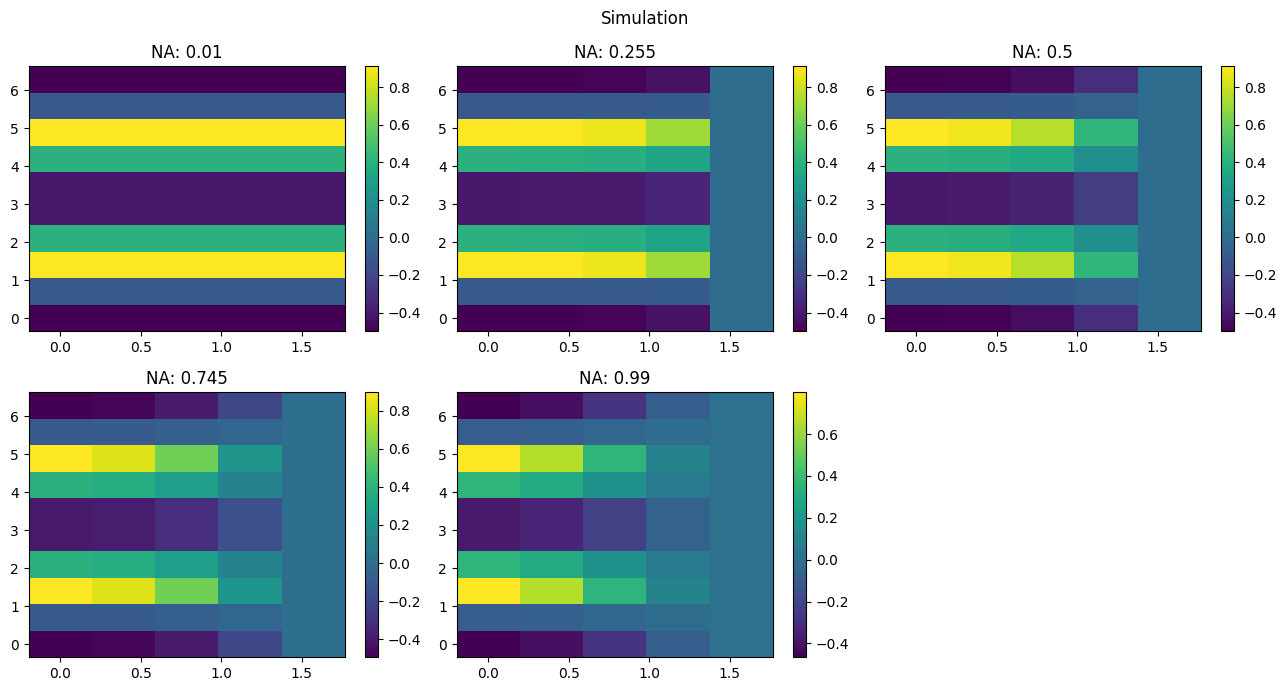

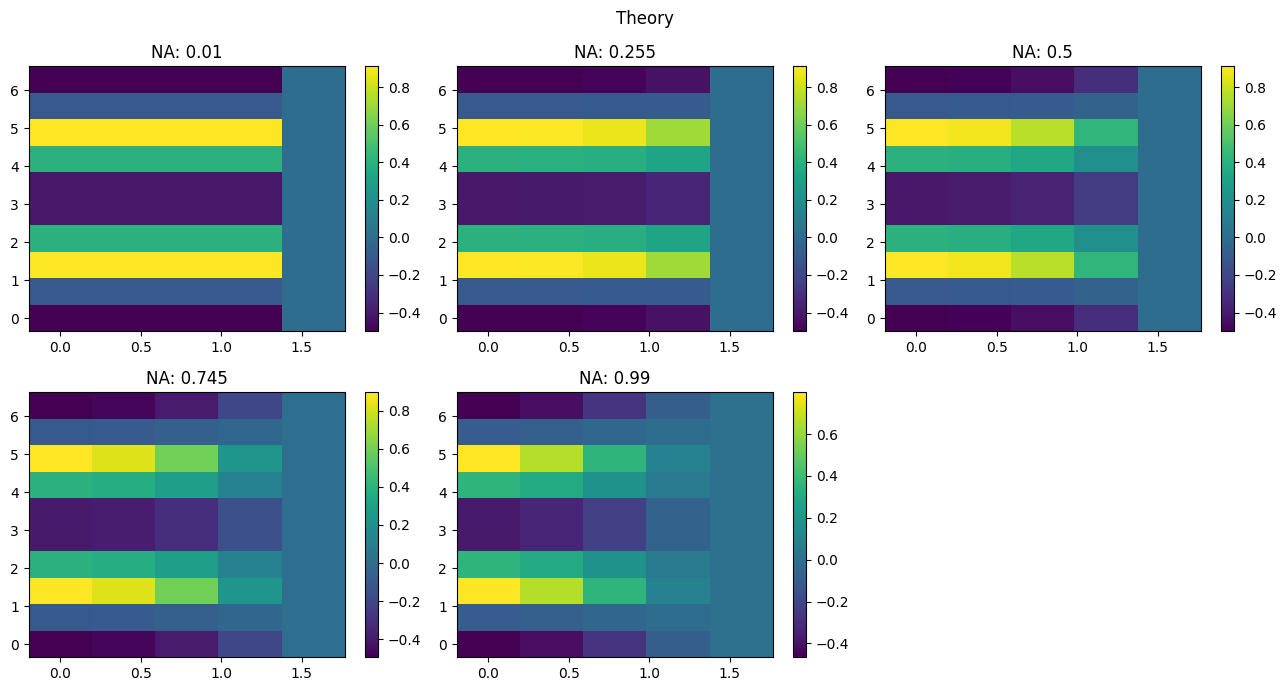

In [6]:
f = plt.figure(figsize=(13,7))
n_plots = aniso_grid.shape[0]
n_cols = 3
n_rows = int(np.ceil(n_plots / n_cols))

for n in range(aniso_grid.shape[0]):
    row = int(np.ceil(n / n_cols))
    col = (n % n_cols) + 1
    ax = f.add_subplot(n_rows, n_cols, n+1)
    pc = ax.pcolormesh(alpha_d_angles, phi_d_angles, aniso_grid[n, :, :],\
    shading='auto')
    f.colorbar(pc)
    ax.set_title(f"NA: {NA_list[n]}")

f.set_tight_layout(True)
f.suptitle("Simulation")

ft = plt.figure(figsize=(13,7))
for n in range(aniso_grid_theory.shape[0]):
    row = int(np.ceil(n / n_cols))
    col = (n % n_cols) + 1
    ax = ft.add_subplot(n_rows, n_cols, n+1)
    # m = ax.imshow((aniso_grid_theory[n, :, :]))
    pc = ax.pcolormesh(alpha_d_angles, phi_d_angles, aniso_grid_theory[n, :, :],\
        shading='auto')

    ft.colorbar(pc)
    ax.set_title(f"NA: {NA_list[n]}")

ft.set_tight_layout(True)
ft.suptitle("Theory")

In [38]:
print(aniso_grid_theory[-1, :, 0])
print(aniso_grid[-1, :, 0])

[-0.46600157 -0.10021597  0.79901134  0.35818787 -0.37755937 -0.37755937
  0.35818787  0.79901134 -0.10021597 -0.46600157]
[-0.46601418 -0.10043738  0.79895717  0.35801495 -0.37757388 -0.37766341
  0.35796948  0.79894197 -0.10032159 -0.46601418]


NAs [0.01  0.255 0.5   0.745 0.99 ]
2 3
phis [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
theta [0.         0.39269908 0.78539816 1.17809725 1.57079633]


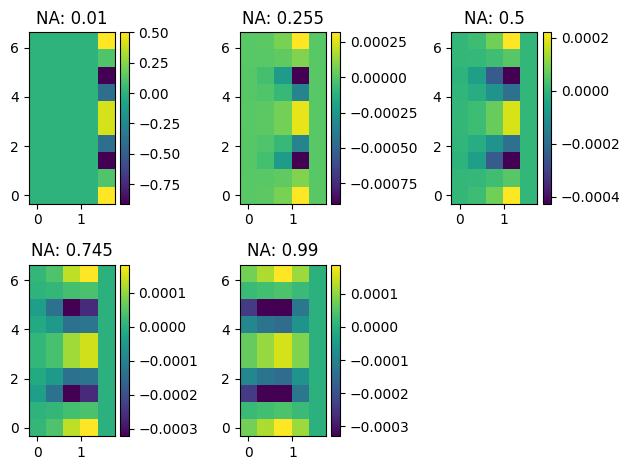

In [7]:
resids = aniso_grid_theory-aniso_grid



# print(resids)
f = plt.figure()
n_plots = resids.shape[0]
n_cols = 3
n_rows = int(np.ceil(n_plots / n_cols))
print("NAs", NA_list)
print(n_rows, n_cols)

xlabs = print("phis", phi_d_angles)
print("theta", alpha_d_angles)

for n in range(resids.shape[0]):
    row = int(np.ceil(n / n_cols))
    col = (n % n_cols) + 1
    ax = f.add_subplot(n_rows, n_cols, n+1)
    pc = ax.pcolormesh(alpha_d_angles, phi_d_angles, resids[n, :, :],\
        shading='auto')    
    f.colorbar(pc)
    ax.set_title(f"NA: {NA_list[n]}")

f.set_tight_layout(True)